In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
print("현재 작업 경로: ", os.getcwd())
os.chdir("/content/drive/MyDrive")
print("변경된 작업 경로: ", os.getcwd())

현재 작업 경로:  /content
변경된 작업 경로:  /content/drive/MyDrive


In [3]:
# import cv2
# import albumentations as A
# from albumentations import Blur, ToGray, CLAHE
# import matplotlib.pyplot as plt

# # 이미지 불러오기
# img_path = "/content/drive/MyDrive/yolo11_test/capstone_dataset/train/images/2025-04-30 14_38_52 min_20.25 max_59.93.png"
# image = cv2.imread(img_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# transform_blur = A.Blur(p=1.0, blur_limit=(3, 7))
# transform_gray = A.ToGray(p=1.0, num_output_channels=3)
# transform_clahe = A.CLAHE(p=1.0, clip_limit=(2.0, 4.0), tile_grid_size=(8, 8))

# # 각각 전처리 적용
# blur_img = transform_blur(image=image)['image']
# gray_img = transform_gray(image=image)['image']
# clahe_img = transform_clahe(image=image)['image']


# # 시각화
# titles = ['Original', 'Blur', 'ToGray', 'CLAHE']
# images = [image, blur_img, gray_img, clahe_img]

# plt.figure(figsize=(12, 6))
# for i in range(4):
#     plt.subplot(1, 4, i + 1)
#     plt.imshow(images[i])
#     plt.title(titles[i])
#     plt.axis('off')
# plt.tight_layout()
# plt.show()

# # 저장
# cv2.imwrite("/content/blur_image.jpg", cv2.cvtColor(blur_img, cv2.COLOR_RGB2BGR))
# cv2.imwrite("/content/gray_image.jpg", cv2.cvtColor(gray_img, cv2.COLOR_RGB2BGR))
# cv2.imwrite("/content/clahe_image.jpg", cv2.cvtColor(clahe_img, cv2.COLOR_RGB2BGR))



In [4]:
def get_temp_from_bgr(bgr):
    i = lut_map.get(tuple(int(v) for v in bgr), None)
    if i is not None:
        return i / 255.0 * (60 - 10) + 10
    else:
        return None  # LUT에 없으면 None 반환

In [6]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시나리오별 디렉토리 경로
base_path = "/content/drive/MyDrive/yolo11_test/Scenario_Dataset"
scenarios = {
    "idle": "dataset_idle",
    "cpu": "dataset_cpu",
    "gpu": "dataset_gpu",
    "union": "dataset_union"
}
results = []
heatmap_data = []
gray = np.arange(256, dtype=np.uint8)
jet_lut = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
lut_map = {tuple(jet_lut[i,0]): i for i in range(256)}

#온도값 계산
for scenario, folder in scenarios.items():
    temperature_list = []
    path = os.path.join(base_path, folder)
    for fname in os.listdir(path):
        if fname.endswith(".png"):
            img = cv2.imread(os.path.join(path, fname))
            height, width = img.shape[:2]
            img_value = np.zeros((height, width))
            #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            """
            hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            v_channel = hsv_image[:,:,2]
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(v_channel)


            min_x, min_y = min_loc
            max_x, max_y = max_loc

            max_temp = img[min_y, min_x]
            min_temp = img[max_y, max_x]
            max_temp = get_temp_from_bgr(max_temp)
            min_temp = get_temp_from_bgr(min_temp)
            """
            for y in range(height):
                for x in range(width):
                    bgr = img[y, x]  # 특정 위치의 BGR 값 추출
                    img_value[y, x] = get_temp_from_bgr(bgr)  # 가정: example() 함수가 정의되어 있음
            min_temp = np.min(img_value)
            max_temp = np.max(img_value)
            mean_temp = np.mean(img_value)
            std_temp = np.std(img_value)
            temperature_list.append(mean_temp)
            results.append({
                "scenario": scenario,
                "file": fname,
                "mean": mean_temp,
                "min": min_temp,
                "max": max_temp,
                "std": std_temp
            })
    heatmap_data.append(temperature_list)
df = pd.DataFrame(results)


In [8]:
gpu = df.loc[df['scenario'] == 'gpu']
gpu

,scenario,file,mean,min,max,std
3979,gpu,2025-04-28 15_40_23 min_20.07 max_39.96.png,25.454105,20.000000,40.000000,3.364577
3980,gpu,2025-04-28 15_40_25 min_20.11 max_40.01.png,25.416585,20.000000,40.000000,3.368044
3981,gpu,2025-04-28 15_40_27 min_20.27 max_40.13.png,25.458252,20.196078,40.196078,3.363344
3982,gpu,2025-04-28 15_40_29 min_20.22 max_40.05.png,25.441493,20.196078,40.000000,3.365642
3983,gpu,2025-04-28 15_40_32 min_20.16 max_40.05.png,25.389001,20.196078,40.000000,3.361274
...,...,...,...,...,...,...
5964,gpu,2025-04-28 15_40_13 min_20.18 max_39.94.png,25.466330,20.196078,40.000000,3.358156
5965,gpu,2025-04-28 15_40_15 min_20.29 max_40.0.png,25.497161,20.196078,40.000000,3.346854
5966,gpu,2025-04-28 15_40_17 min_20.22 max_40.13.png,25.482169,20.196078,40.196078,3.360786
5967,gpu,2025-04-28 15_40_19 min_20.04 max_40.05.png,25.471303,20.000000,40.000000,3.365600


In [9]:
df.loc[df['scenario'] == 'cpu']

,scenario,file,mean,min,max,std
1990,cpu,2025-04-29 15_52_27 min_19.95 max_59.69.png,26.320476,19.803922,59.803922,4.302026
1991,cpu,2025-04-29 15_47_07 min_20.0 max_59.85.png,26.213542,20.000000,60.000000,4.271293
1992,cpu,2025-04-29 15_46_17 min_20.02 max_59.21.png,26.051134,20.000000,59.215686,4.235835
1993,cpu,2025-04-29 16_34_24 min_20.38 max_59.99.png,26.763062,20.392157,60.000000,4.428662
1994,cpu,2025-04-29 16_25_54 min_20.22 max_59.29.png,26.628615,20.196078,59.411765,4.291316
...,...,...,...,...,...,...
3974,cpu,2025-04-29 16_13_15 min_20.4 max_59.61.png,26.643270,20.392157,59.803922,4.261847
3975,cpu,2025-04-29 16_04_46 min_20.02 max_58.66.png,26.248192,20.000000,58.823529,4.270071
3976,cpu,2025-04-29 16_15_26 min_20.04 max_59.79.png,26.562234,20.000000,59.803922,4.339142
3977,cpu,2025-04-29 16_17_48 min_20.25 max_58.87.png,26.452196,20.196078,59.019608,4.215925


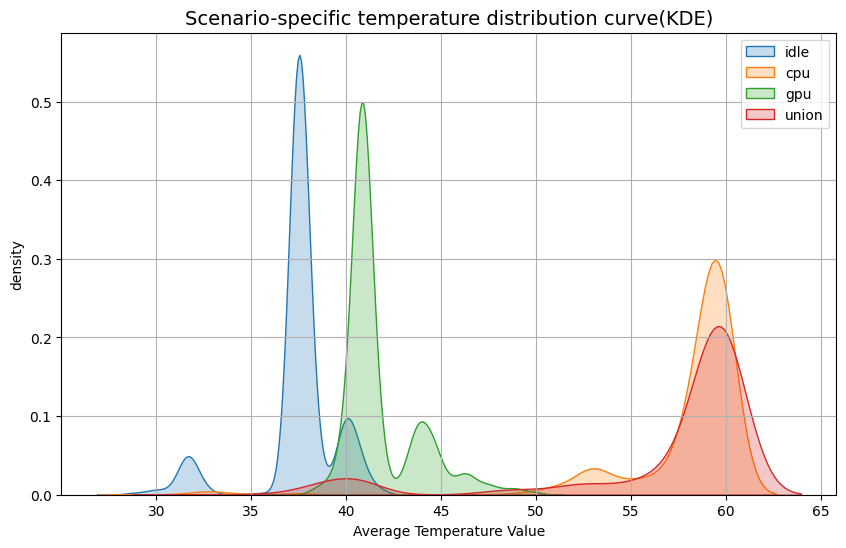

In [10]:
import seaborn as sns
plt.figure(figsize=(10, 6))
for scenario in scenarios:
    sns.kdeplot(df[df["scenario"] == scenario]["max"], label=scenario, fill=True)
plt.title("Scenario-specific temperature distribution curve(KDE)", fontsize=14)
plt.xlabel("Average Temperature Value")
plt.ylabel("density")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# 시나리오별 통계 요약
summary = df.groupby("scenario")["max"].agg(["mean", "std", "min", "max"]).reset_index()
summary = summary.round(0)  # 소수점 2자리로 반올림

# 결과 출력
print("시나리오별 평균 온도값 통계")
print(summary)

시나리오별 평균 온도값 통계
  scenario  mean  std   min   max
0      cpu  58.0  4.0  30.0  60.0
1      gpu  42.0  2.0  34.0  50.0
2     idle  37.0  2.0  28.0  42.0
3    union  57.0  6.0  33.0  60.0


In [12]:
# 시나리오별 통계 요약
summary = df.groupby("scenario")["max"].agg(["mean", "std", "min", "max"]).reset_index()
summary = summary.round(0)  # 소수점 2자리로 반올림

# 결과 출력
print("시나리오별 최대 온도값 통계")
print(summary)

시나리오별 최대 온도값 통계
  scenario  mean  std   min   max
0      cpu  58.0  4.0  30.0  60.0
1      gpu  42.0  2.0  34.0  50.0
2     idle  37.0  2.0  28.0  42.0
3    union  57.0  6.0  33.0  60.0


In [13]:
import pandas as pd

# df는 'scenario', 'mean_brightness' 컬럼이 있다고 가정
stats = df.groupby('scenario')['max'].describe().round(0)
print(stats)


           count  mean  std   min   25%   50%   75%   max
scenario                                                 
cpu       1989.0  58.0  4.0  30.0  58.0  59.0  60.0  60.0
gpu       1990.0  42.0  2.0  34.0  41.0  41.0  42.0  50.0
idle      1990.0  37.0  2.0  28.0  37.0  38.0  38.0  42.0
union     1990.0  57.0  6.0  33.0  58.0  60.0  60.0  60.0


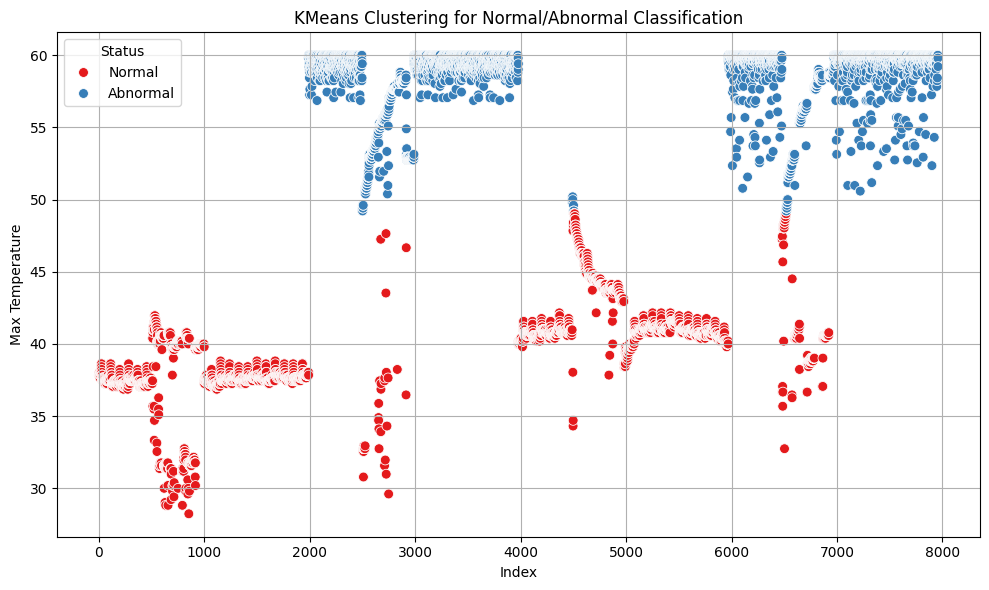

           count  mean  std   min   25%   50%   75%   max
status                                                   
Abnormal  3727.0  59.0  2.0  49.0  58.0  59.0  60.0  60.0
Normal    4232.0  40.0  3.0  28.0  38.0  40.0  41.0  49.0


In [14]:
from sklearn.cluster import KMeans
# 데이터 준비 (가정: df는 'mean' 열을 가지고 있음)
temperature = df["max"].values.reshape(-1, 1)

# KMeans 클러스터링 (2개의 클러스터로 설정, 정상과 비정상)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(temperature)

# 클러스터 중심을 기준으로 정상/비정상 라벨링
# 클러스터 중심이 낮은 값을 정상, 높은 값을 비정상으로 가정
cluster_centers = kmeans.cluster_centers_.flatten()
normal_cluster = np.argmin(cluster_centers)  # 낮은 값이 정상
abnormal_cluster = np.argmax(cluster_centers)  # 높은 값이 비정상

# 클러스터 라벨을 정상/비정상으로 변경
df["status"] = df["cluster"].apply(lambda x: "Normal" if x == normal_cluster else "Abnormal")

# 클러스터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y="max", hue="status", palette="Set1", data=df, s=50)
plt.title("KMeans Clustering for Normal/Abnormal Classification")
plt.xlabel("Index")
plt.ylabel("Max Temperature")
plt.legend(title="Status")
plt.grid(True)
plt.tight_layout()
plt.show()

# 클러스터의 특성 확인 (평균값, 표준편차 등)
cluster_stats = df.groupby("status")["max"].describe().round(0)
print(cluster_stats)


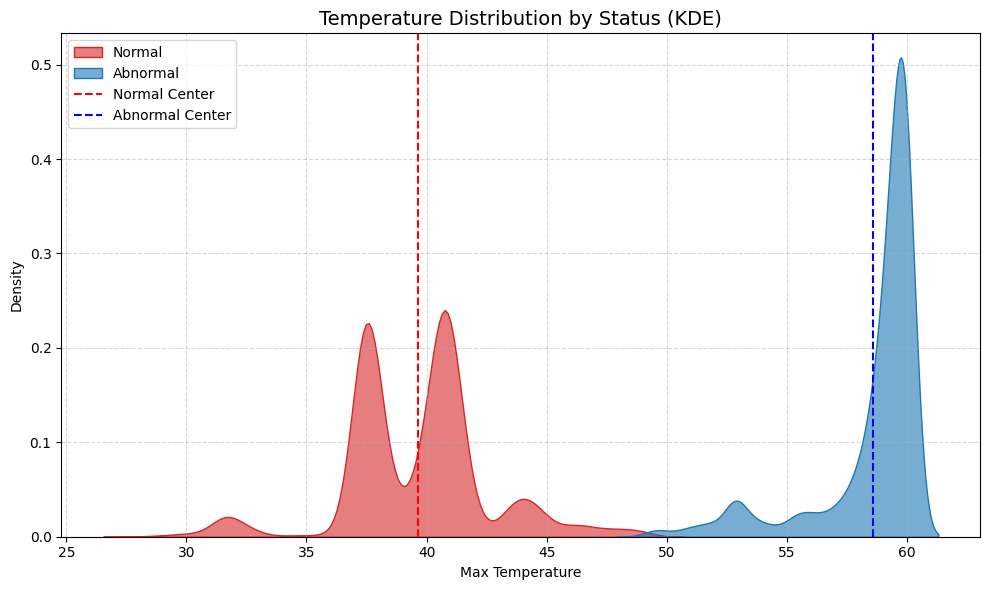

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df["status"] == "Normal"]["max"], label="Normal", fill=True, color="#d62728", alpha=0.6)  # 빨간색
sns.kdeplot(data=df[df["status"] == "Abnormal"]["max"], label="Abnormal", fill=True, color="#1f77b4", alpha=0.6)  # 파란색

plt.axvline(cluster_centers[normal_cluster], color="red", linestyle="--", label="Normal Center")
plt.axvline(cluster_centers[abnormal_cluster], color="blue", linestyle="--", label="Abnormal Center")

plt.title("Temperature Distribution by Status (KDE)", fontsize=14)
plt.xlabel("Max Temperature")
plt.ylabel("Density")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("kde_status_overlay.png", dpi=300)
plt.show()


In [24]:
# 경로 설정
base_path = "/content/drive/MyDrive/yolo11_test/Scenario_Dataset"
scenarios2 = ['dataset_idle', 'dataset_cpu', 'dataset_gpu', 'dataset_union']

# 각 시나리오에 대해 평균 온도값 계산
heatmap_data = []
for scenario in scenarios2:
    scenario_path = os.path.join(base_path, scenario)
    temperature_list = []

    for filename in sorted(os.listdir(scenario_path)):
        if filename.endswith(".png"):
            img_path = os.path.join(scenario_path, filename)
            img = cv2.imread(img_path)
            height, width = img.shape[:2]
            img_value = np.zeros((height, width))
            for y in range(height):
                for x in range(width):
                    bgr = img[y, x]  # 특정 위치의 BGR 값 추출
                    img_value[y, x] = get_temp_from_bgr(bgr)  # 가정: example() 함수가 정의되어 있음
            max_temperature = np.max(img_value)
            temperature_list.append(max_temperature)

    heatmap_data.append(temperature_list)

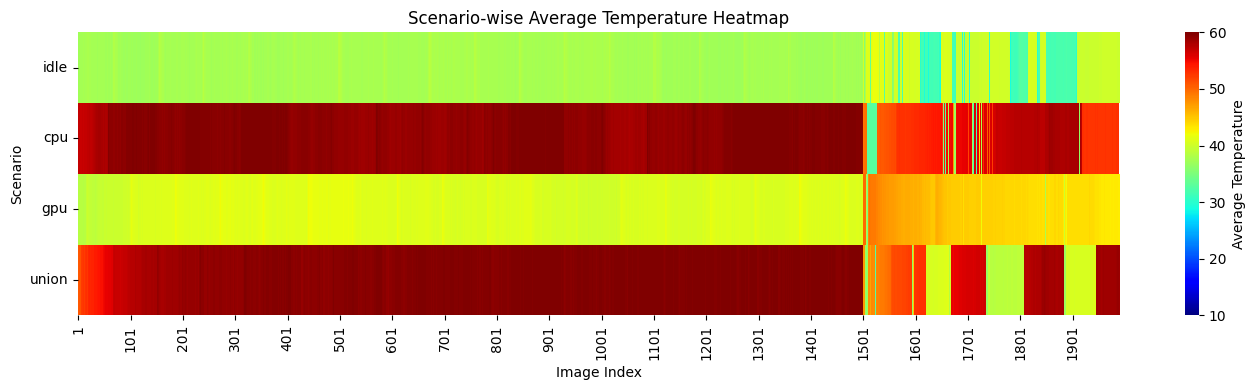

In [34]:
# 히트맵 그리기
plt.figure(figsize=(14, 4))

max_len = max(len(row) for row in heatmap_data)
padded_data = [row + [np.nan] * (max_len - len(row)) for row in heatmap_data]
padded_array = np.array(padded_data)

valid_data = padded_array[~np.isnan(padded_array)]
vmin = np.percentile(valid_data, 5)  # 하위 5% 값
vmax = np.percentile(valid_data, 95)  # 상위 5% 값

# sns.heatmap(heatmap_data, cmap='hot', annot=False, cbar_kws={'label': 'Average Brightness'}) #노란
sns.heatmap(padded_array, cmap='jet', annot=False,
            vmin=10, vmax=60,
            cbar_kws={'label': 'Average Temperature'})
plt.yticks(ticks=np.arange(len(scenarios)) + 0.5, labels=[s.replace("dataset_", "") for s in scenarios], rotation=0)

# X축 라벨 간격 조절 (예: 100개마다 한 번만 표시)
x_interval = 100
num_images = padded_array.shape[1]
plt.xticks(
    ticks=np.arange(0, num_images, x_interval) + 0.5,
    labels=[str(i + 1) for i in range(0, num_images, x_interval)],
    rotation=90
)

plt.xlabel("Image Index")
plt.ylabel("Scenario")
plt.title("Scenario-wise Average Temperature Heatmap")
plt.tight_layout()
plt.show()